# BASIC STATISTICS  
## Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler

## Step 1 : Load the Dataset

In [2]:
df = pd.read_csv('sales_data_with_discounts.csv')
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (450, 13)


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


## Step 2: Identify Numerical and Categorical Columns

In [3]:
# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)

Numeric Columns: ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']
Categorical Columns: ['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']


## Step 3: Descriptive Analytics for Numerical Columns

In [4]:
# Compute statistics
desc_stats = pd.DataFrame(index=numeric_cols, columns=['Mean','Median','Mode','Std_Dev'])
for col in numeric_cols:
    desc_stats.loc[col, 'Mean'] = df[col].mean()
    desc_stats.loc[col, 'Median'] = df[col].median()
    desc_stats.loc[col, 'Mode'] = df[col].mode()[0]
    desc_stats.loc[col, 'Std_Dev'] = df[col].std()

desc_stats

,Mean,Median,Mode,Std_Dev
Volume,5.066667,4.0,3,4.231602
Avg Price,10453.433333,1450.0,400,18079.90484
Total Sales Value,33812.835556,5700.0,24300,50535.074173
Discount Rate (%),15.155242,16.577766,5.007822,4.220602
Discount Amount,3346.499424,988.933733,69.177942,4509.902963
Net Sales Value,30466.336131,4677.788059,326.974801,46358.656624


## Step 4:Visualization of Data

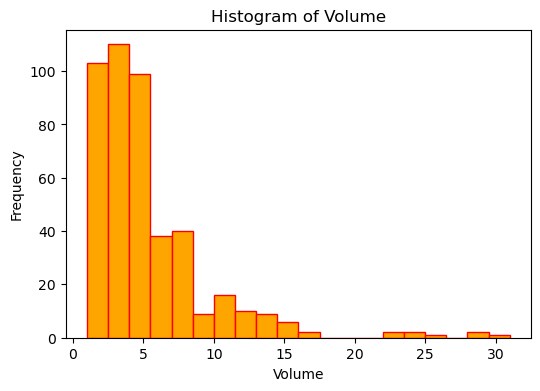

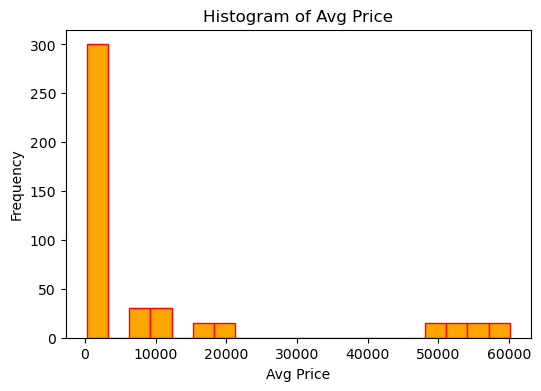

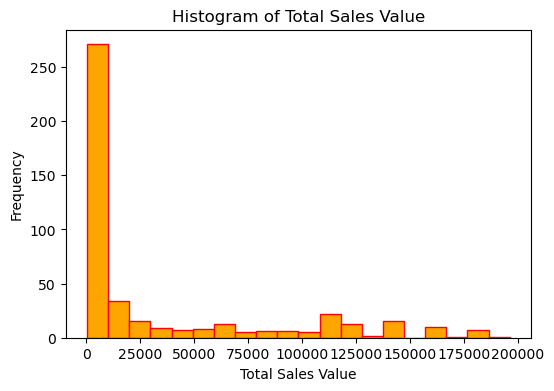

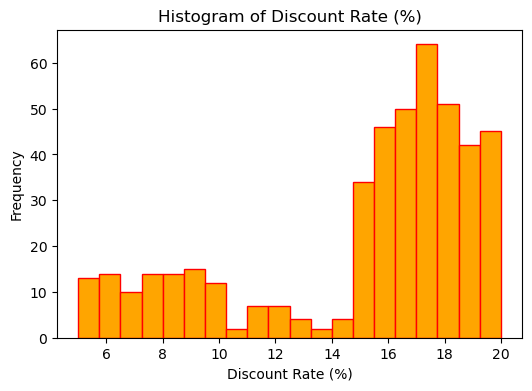

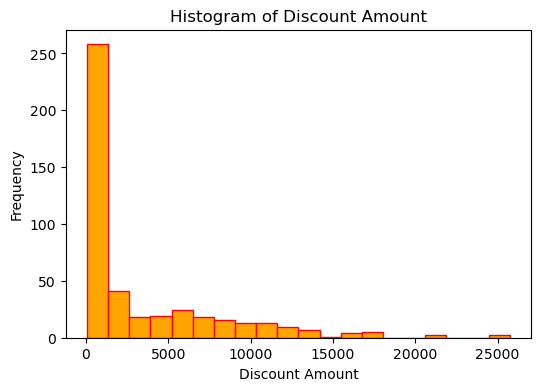

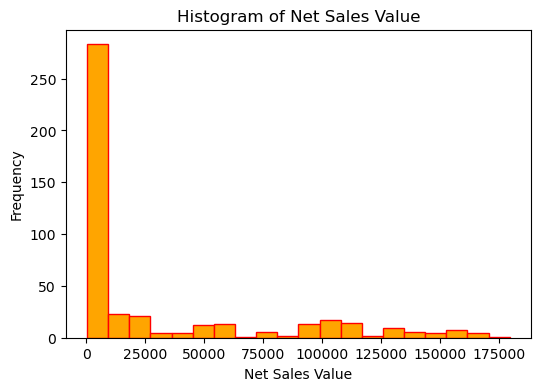

In [5]:
# Plot histograms for each numerical column
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col].dropna(), bins=20, color='orange', edgecolor='red')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

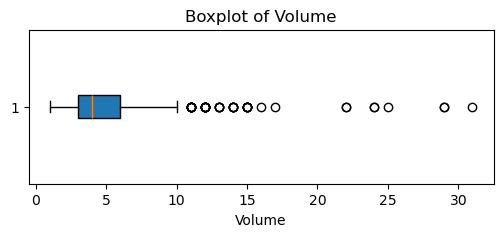

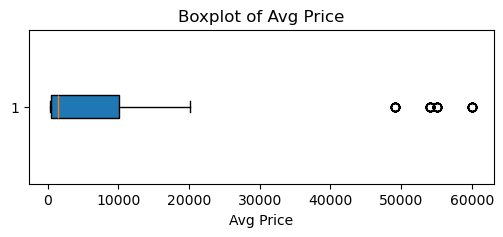

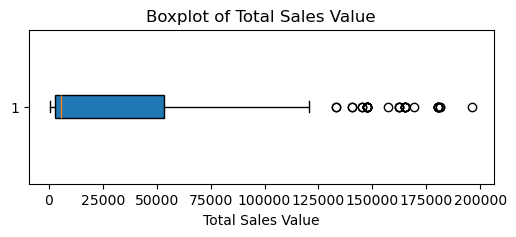

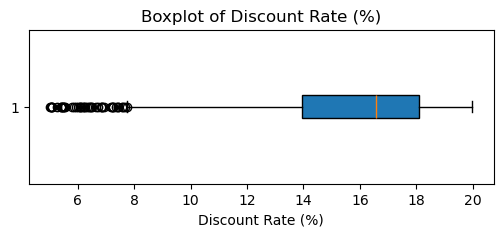

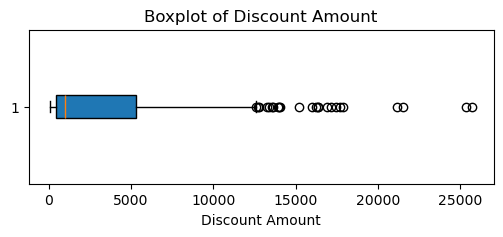

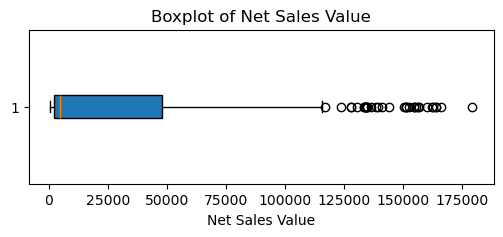

In [6]:
# Plot boxplots for numeric columns
for col in numeric_cols:
    plt.figure(figsize=(6,2))
    plt.boxplot(df[col].dropna(), vert=False, patch_artist=True)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

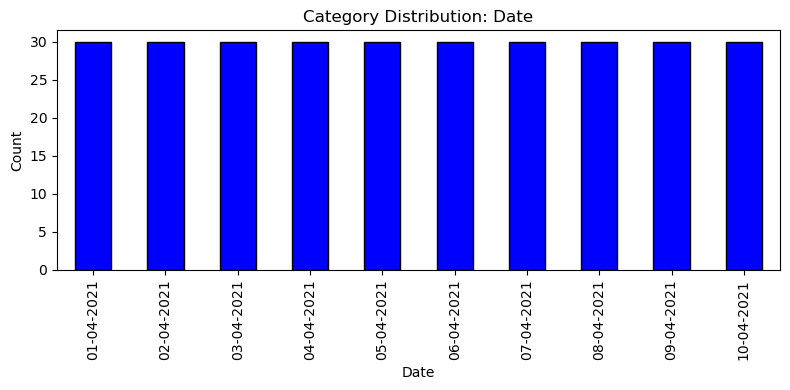

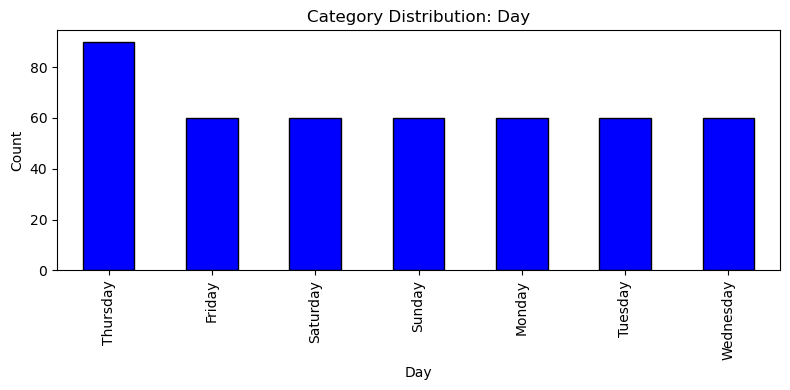

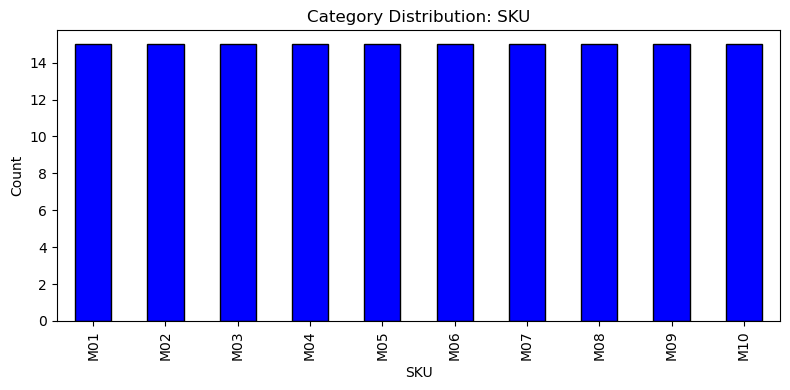

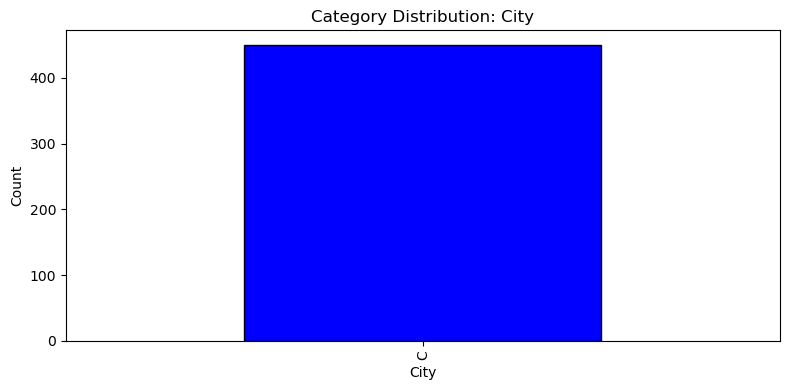

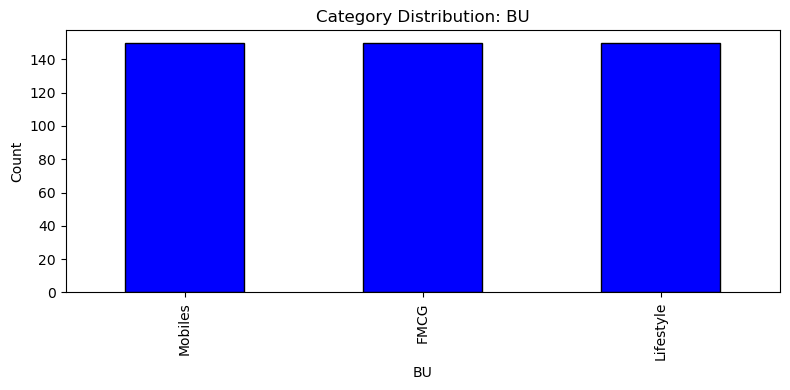

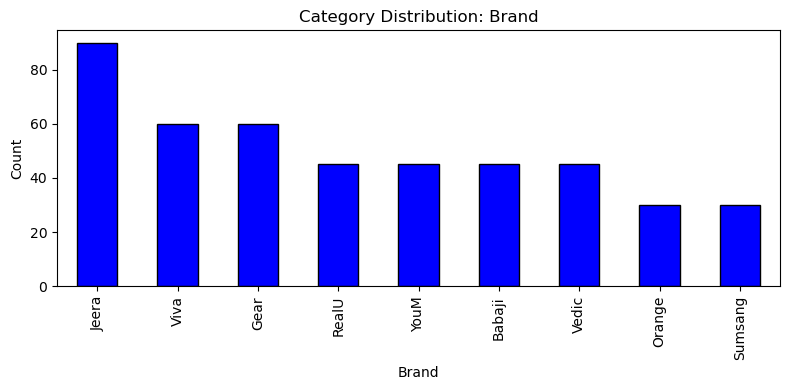

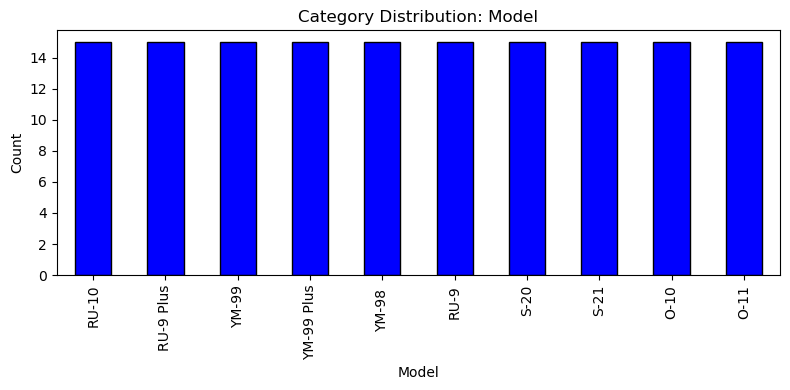

In [7]:
# Bar chart for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    df[col].value_counts().head(10).plot(kind='bar', color='blue', edgecolor='black')
    plt.title(f"Category Distribution: {col}")
    plt.ylabel("Count")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

## Step 5: Standardization Numerical Variables

In [8]:
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])
sample_col = numeric_cols[0]
comparison = pd.DataFrame({
    'Original': df[sample_col].head(10),
    'Standardized': df_scaled[sample_col].head(10)
})
comparison

,Original,Standardized
0,15,2.350029
1,10,1.167129
2,7,0.457388
3,6,0.220808
4,3,-0.488932
5,3,-0.488932
6,3,-0.488932
7,2,-0.725512
8,2,-0.725512
9,3,-0.488932


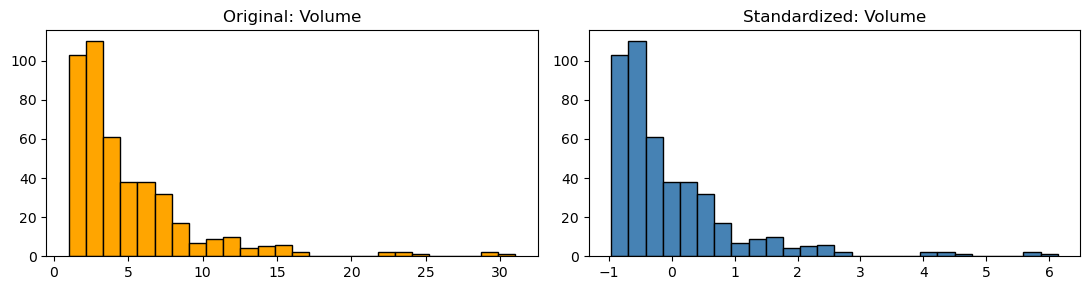

In [9]:
# Compare histograms before and after scaling
plt.figure(figsize=(11,3))
plt.subplot(1,2,1)
plt.hist(df[sample_col].dropna(), bins=26, color='orange', edgecolor='black')
plt.title(f"Original: {sample_col}")

plt.subplot(1,2,2)
plt.hist(df_scaled[sample_col].dropna(), bins=26, color='steelblue', edgecolor='black')
plt.title(f"Standardized: {sample_col}")
plt.tight_layout()
plt.show()

## Step 6: Conversion of Categorical Data into Dummy Variables

In [10]:
df_encoded = pd.get_dummies(df_scaled, columns=categorical_cols, drop_first=False)

print("Original shape:", df.shape)
print("Encoded shape:", df_encoded.shape)
df_encoded.head()

Original shape: (450, 13)
Encoded shape: (450, 101)


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


## Step 7: Conclusion

In [11]:
print("\n Summary:")
print("""-We successfully performed Descriptive Analytics on the Sales & Discounts dataset.
-Visualized data distributions and detected outliers.
-Standardized numerical data using z-score normalization.
-Converted categorical variables into dummy (binary) variables for modeling.""")


 Summary:
-We successfully performed Descriptive Analytics on the Sales & Discounts dataset.
-Visualized data distributions and detected outliers.
-Standardized numerical data using z-score normalization.
-Converted categorical variables into dummy (binary) variables for modeling.
